**Coding Assignment 6**

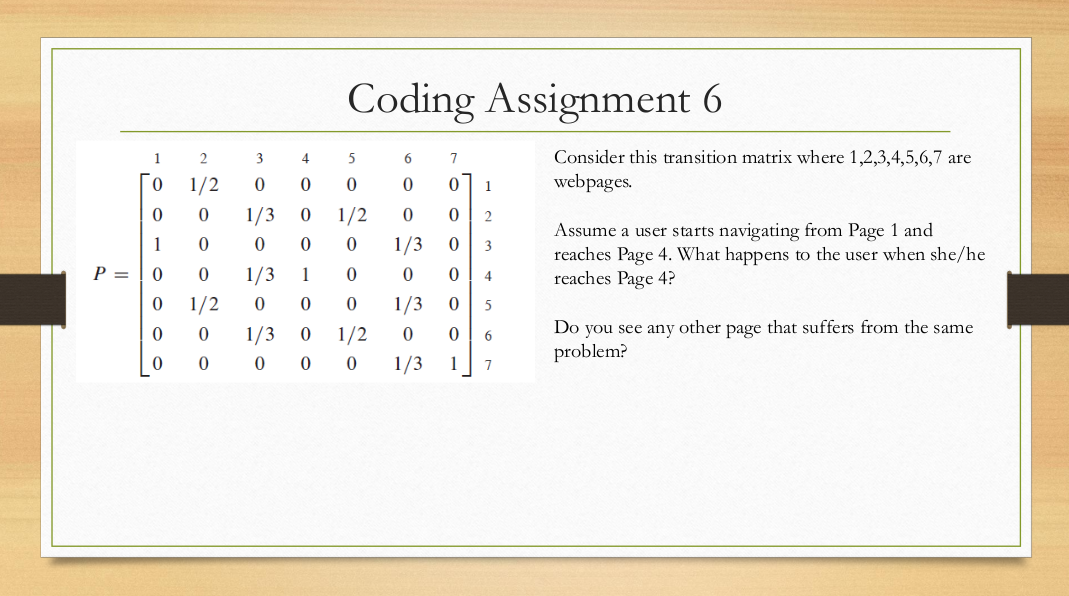
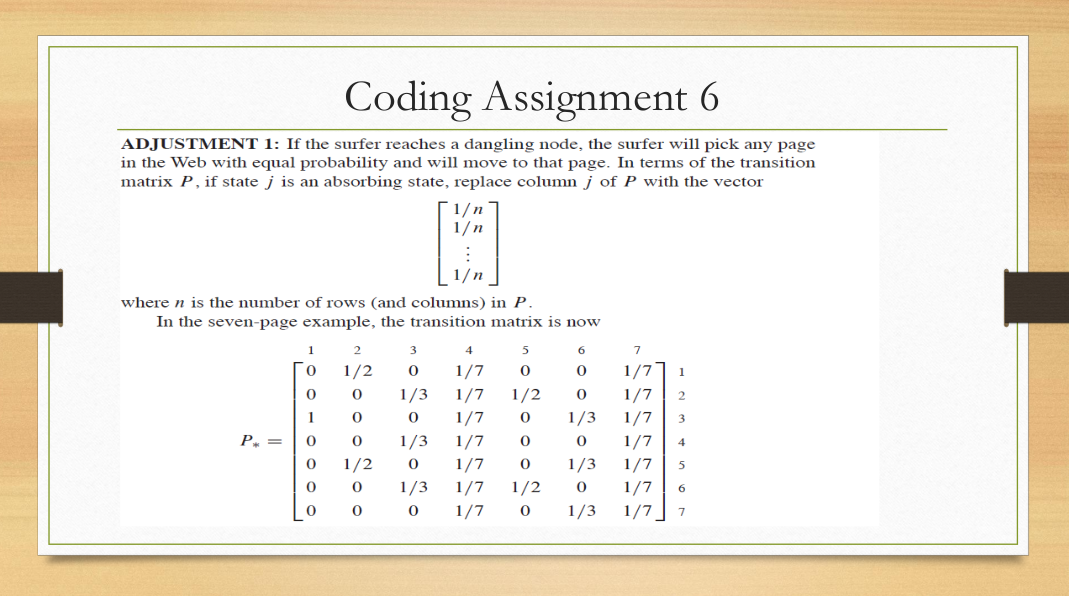
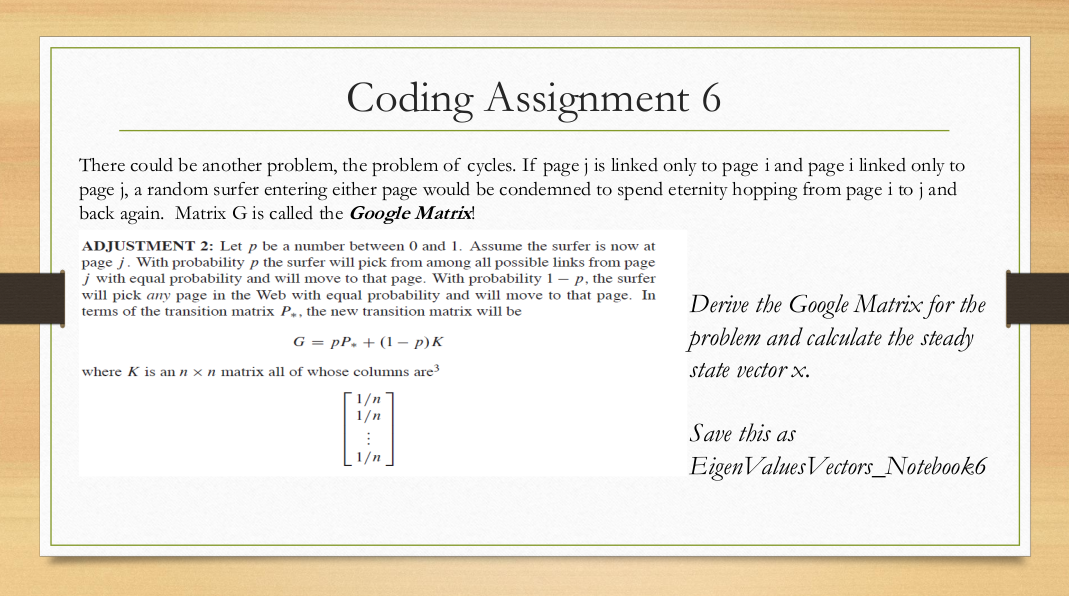

**If we land on page 4, we will always on the page 4 since it has only one outgoing link which is itself.
The page 7 also have this issue.**

**The problem here is, the other page's rank significance will become very low (zero over many iterations).**

**If we see the transition matrix, column 4 and column 7 has self looping links. It can lead to page rank signifance to page 4 and page 7 very high and others very low. We have to make adjustment that these nodes (columns) have to divided by the value 1/n where n is total number of pages.**

In [6]:
# Importing libraries
import numpy as np

In [7]:
# Define the transition probability matrix A
A = np.array([
    [0, 1/2, 0, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 1/2, 0, 0],
    [1, 0, 0, 0, 0, 1/3, 0],
    [0, 0, 1/3, 1, 0, 0, 0],
    [0, 1/2, 0, 0, 0, 1/3, 0],
    [0, 0, 1/3, 0, 1/2, 0, 0],
    [0, 0, 0, 0, 0, 1/3, 1]
])

print("Transition Probability Matrix A:\n", A)

Transition Probability Matrix A:
 [[0.         0.5        0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [1.         0.         0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 1.         0.         0.
  0.        ]
 [0.         0.5        0.         0.         0.         0.33333333
  0.        ]
 [0.         0.         0.33333333 0.         0.5        0.
  0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  1.        ]]


**We have dangling nodes for column 4 (page 4 ) and column 7 (page 7 ).Replace the entire column with the value of 1/n, where n means total number of pages.
It means that we have equal probability now to move to any page from page 4 and page 7.The previous has no probabilty to move to any other pages except the same pages.**

***Note:***
Dangling nodes refers to the node that has no outgoing links (except the link that points itself).

In [8]:
num_of_pages = len(A)
num_of_rows = len(A)
num_of_columns = len(A[0])
# Dangling nodes are found and replacing the column with the value of 1/total_pages
for i in range(num_of_rows):
    if A[i][i] == 1:
        for j in range(num_of_columns):
            A[j][i] = 1/num_of_pages

print("Transition Probability Matrix after adjustment 1:\n",A)

Transition Probability Matrix after adjustment 1:
 [[0.         0.5        0.         0.14285714 0.         0.
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [1.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.         0.
  0.14285714]
 [0.         0.5        0.         0.14285714 0.         0.33333333
  0.14285714]
 [0.         0.         0.33333333 0.14285714 0.5        0.
  0.14285714]
 [0.         0.         0.         0.14285714 0.         0.33333333
  0.14285714]]


**There could be another problem, the problem of cycles. If page j is linked only to page i and page i linked only to page j, a random surfer entering either page would be condemned to spend eternity hopping from page i to j and back again.The Google matrix G will help us to solve this above problem.**

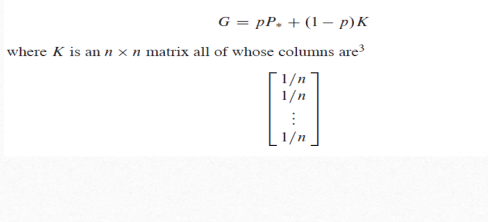

***Let's find the Google matrix***

In [9]:
# Defining the function for fniding the google matrix
def google_matrix(damping_factor, A):
    num_of_rows = num_of_pages = len(A)
    num_of_columns = len(A[0])
    K = (1/num_of_pages)*np.ones((num_of_rows, num_of_columns))
    G = (1 - damping_factor)*K + damping_factor*A
    print("Google Matrix:\n",G)
    return G

    

Even though we are making some changes with the matrix, The sum of all elements in each column in the matrix remains to be 1.

In [10]:
# Damping factor ranges from 0 to 1
d = 0.8
G = google_matrix(d,A)

Google Matrix:
 [[0.02857143 0.42857143 0.02857143 0.14285714 0.02857143 0.02857143
  0.14285714]
 [0.02857143 0.02857143 0.2952381  0.14285714 0.42857143 0.02857143
  0.14285714]
 [0.82857143 0.02857143 0.02857143 0.14285714 0.02857143 0.2952381
  0.14285714]
 [0.02857143 0.02857143 0.2952381  0.14285714 0.02857143 0.02857143
  0.14285714]
 [0.02857143 0.42857143 0.02857143 0.14285714 0.02857143 0.2952381
  0.14285714]
 [0.02857143 0.02857143 0.2952381  0.14285714 0.42857143 0.02857143
  0.14285714]
 [0.02857143 0.02857143 0.02857143 0.14285714 0.02857143 0.2952381
  0.14285714]]


**Now, Lets find the steady state vector**

We can find the steady state vector by iterative multiplication of Google matrix with column vector [1, 0, 0, 0, 0, 0, 0] assuming that starting from page 1 (We can choose any page) for n iterations. Also, we know that from our previous assignment we can just find the steady state vector by finding the eigen vector for eigen value(nearer to 1) for the Google matrix G.

In [11]:
# Calculate the eigenvalues and eigenvectors of Google matrix
eigenvalues, eigenvectors = np.linalg.eig(G)

# Find the index of the eigenvalue closest to 1
index_of_eigen_value = np.argmin(np.abs(eigenvalues - 1))

# Extract the corresponding eigenvector
x = np.real(eigenvectors[:, index_of_eigen_value])

# Normalize the eigenvector to sum to 1
x = x / np.sum(x)

print("Steady-state vector:\n", x)


Steady-state vector:
 [0.11774064 0.16656953 0.18972388 0.10170586 0.16215918 0.16656953
 0.09553137]


In [34]:
# By iterative method

def steady_state_vector(vector, Google_matrix, threshold):
    iterations = 100
    for i in range(iterations):
        previous_vector = np.round(np.dot(Google_matrix, vector), 8)
        # If all the elements are same again after the multiplication, stop the iteration
        if ((np.abs(previous_vector - vector).all() < threshold)):
            break
        vector = previous_vector
    print("Steady state vector")
    print(vector)

In [35]:
# vector as starting from page 1
vector = np.array([1, 0, 0, 0, 0, 0, 0])


In [36]:
# Threshold value to stop the iterations
threshold = 0.0000001
steady_state_vector(vector, G, threshold)

Steady state vector
[0.11774065 0.16656952 0.18972386 0.10170587 0.1621592  0.16656952
 0.09553137]


In [37]:
# From both the methods, we can see that both results are the same steady state vector.
# Printing the steady state vector with the pages.
print("Steady-state vector x:")
for i, element in enumerate(x, start=1):
    print(f"Page {i}: {element:.5f}")

Steady-state vector x:
Page 1: 0.11774
Page 2: 0.16657
Page 3: 0.18972
Page 4: 0.10171
Page 5: 0.16216
Page 6: 0.16657
Page 7: 0.09553
